# Bezmomentová skořepina II

## Zadání

U skořepiny podle obrázku proveďte napjatostní analýzu.

<img src="bezmomentova_skorepina1a.png" alt="bezmomentová skořepina" title="bezmomentová skořepina" width="400"/>

## Řešení

Načtení potřebných knihoven a iniciace kvalitního výpisu.

In [1]:
%matplotlib inline
from sympy import pi,init_printing,symbols,Integral,integrate,sin,cos,solveset,lambdify,sqrt,Rational
from numpy import linspace
import matplotlib.pyplot as plt
import math as math

init_printing()

Zavedení potřebných symbolů.

In [2]:
rho,g=symbols('rho q')
h,phi,phi1,R,r0,r_theta,r_phi=symbols('h varphi varphi1 R r0 r_theta r_varphi')
N_phi,N_theta=symbols('N_varphi N_theta')
L1,L2=symbols('L1 L2')
z,alpha=symbols('z alpha')
p=symbols('p')

### Uvolnění

<img src="bezmomentova_skorepina1b.png" alt="bezmomentová skořepina" title="bezmomentová skořepina" width="400"/>

### Kuželová část

Pro silovou rovnováhu v ose $z$ platí,

\begin{equation}
 2\pi r_0N_\varphi\cos\alpha+F=0,
\end{equation}
kde $\alpha$ je úhel ve vrcholu kužele a $F$ je výslednice vnějších sil ve směru osy $z$.

Protože

\begin{equation}
 \tan\alpha=\frac{R}{L_1} \Rightarrow \cos\alpha=\frac{1}{2}\left(-\tan^2\alpha+\sqrt{\tan^4\alpha+4}\right)=\frac{1}{2}\left(-\frac{R^2}{L_1^2}+\sqrt{\frac{R^4}{L_1^4}+4}\right)
\end{equation}
kde $\alpha\in(0,\pi/2)$, může se předchozí rovnice napsat ve tvaru
\begin{equation}
 N_\varphi=\frac{-FL_1^2}{\pi r_0\left(-R^2+\sqrt{R^4+4L_1^4}\right)}.
\end{equation}

Silová výslednice $F$ je příspěvek od vnitřního tlaku a hmotnosti kuželového elementu skořepiny. Plocha kužele bez podstavy je $\pi rs$, kde $r$ je poloměr podstavy kužele a $s$ je délka tvořící polopřímky pláště, v našem případě $s=z/\cos\alpha=r_0/\sin\alpha$.

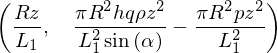

In [3]:
r0=z*R/L1
Fg=rho*g*h*pi*r0*r0/sin(alpha)
F=-pi*r0**2*p+Fg
r0,F

Meridiánová síla $N_\varphi$,

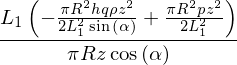

In [4]:
N_phi_solved=-F/2/pi/r0/cos(alpha)
N_phi_solved

Protože křivost meridiánové křivky je nulová ($r_\varphi\rightarrow\infty$), platí pro tečnou sílu,
\begin{equation}
 \frac{N_\theta}{r_\theta}=p+\frac{F_g}{2\pi r_0h}\sin\alpha.
\end{equation}

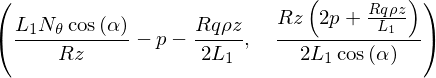

In [5]:
eqn=N_theta/r0 *cos(alpha)-p-Fg/2/pi/r0/h*sin(alpha)
sol=solveset(eqn,N_theta)
N_theta_solved=sol.args[0]
eqn,N_theta_solved

Převedení $\sigma_\varphi^1$ a $\sigma_\theta^1$ na funkce.

In [6]:
sigma1_phi_=lambdify((z,L1,R,p,h,rho,g,alpha),N_phi_solved/h)
sigma1_theta_=lambdify((z,L1,R,p,h,rho,g,alpha),N_theta_solved/h)

### Válcová část

Pro silovou rovnováhu v ose $z$ platí,

\begin{equation}
 2\pi RN_\varphi+F=0,
\end{equation}

kde $F$ je výslednice vnějších sil ve směru osy $z$.

Silová výslednice $F$, opět je to příspěvek od hmotnosti kuželové části a valcové části nadoby a tlaku v nádobě.

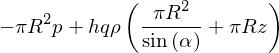

In [7]:
Fg=rho*g*h*(pi*R*R/sin(alpha)+pi*R*z)
F=-pi*R**2*p+Fg
F

Meridiánová síla $N_\varphi$.

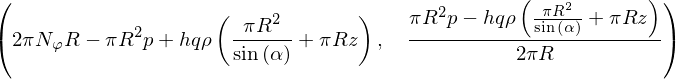

In [8]:
eqn=2*pi*R*N_phi+F
sol=solveset(eqn,N_phi)
N_phi_solved=sol.args[0]
eqn,N_phi_solved

Protože křivost meridiánové křivky je nulová ($r_\varphi\rightarrow\infty$), platí pro tečnou sílu (gravitační síla zde v tomto případě nehraje roli),
\begin{equation}
 \frac{N_\theta}{r_\theta}=p.
\end{equation}

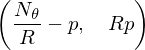

In [9]:
eqn=N_theta/R-p
sol=solveset(eqn,N_theta)
N_theta_solved=sol.args[0]
eqn,N_theta_solved

Převedení $\sigma_\varphi^2$ a $\sigma_\theta^2$ na funkce.

In [10]:
sigma2_phi_=lambdify((z,R,p,h,rho,g,alpha),N_phi_solved/h)
sigma2_theta_=lambdify((R,p,h),N_theta_solved/h)

### Kulová část

Podobně jako v prvním příkladu, pro silovou rovnováhu v ose $z$ platí,

\begin{equation}
 2\pi r_0N_\varphi\sin\varphi+F=0,
\end{equation}

kde $F$ je výslednice vnějších sil ve směru osy $z$, tj. jak tlaková síla, tak gravitační tentokrát působí totožně,

\begin{equation}
 F=-\pi r_0^2p-\rho gh\int_0^{\varphi}2\pi r_0R\mathrm{d}\varphi_1
\end{equation}

a pro $z$ a $r_0$ platí

\begin{equation}
 z=R\cos\varphi\quad\mathrm{a}\quad r_0=R\sin\varphi.
\end{equation}

Z prvního z posledních dvou vztahů plyne

\begin{equation}
 \cos\varphi=\frac{z}{R}\quad\mathrm{a}\quad\sin\varphi=\sqrt{1-\left(\frac{z}{R}\right)^2}\qquad\mathrm{pro}\quad|z|\leq R
\end{equation}

Pro sílu $F$ platí.

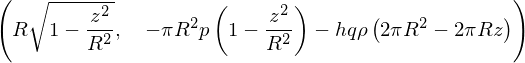

In [11]:
r0=R*sqrt(1-(z/R)**2)
Fg=rho*g*h*integrate(2*pi*R*sin(phi)*R,[phi,0,phi])
Fg_z=Fg.subs(cos(phi),z/R)
F=-pi*r0**2*p-Fg_z
r0,F

Silová rovnováha v ose $z$ a meridiánová síla $N_\varphi$.

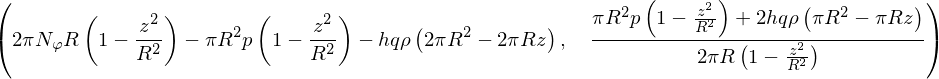

In [12]:
eqn=2*pi*r0*N_phi*sqrt(1-(z/R)**2)+F
sol=solveset(eqn,N_phi)
N_phi_solved=sol.args[0]
eqn,N_phi_solved

Protože křivost koule je ve všech bodech a směrech stejna platí $r_\varphi=r_\theta=R$ a platí,
\begin{equation}
 \frac{N_\varphi}{R}+\frac{N_\theta}{R}=p-\frac{F_g}{2\pi r_0h}\sin(\varphi).
\end{equation}

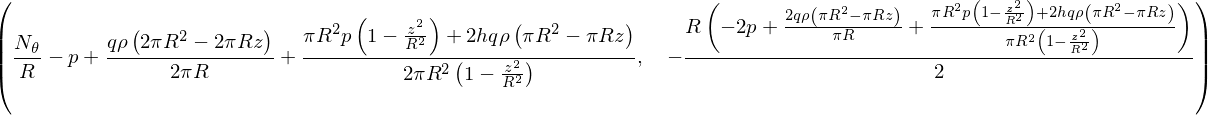

In [13]:
eqn=N_phi_solved/R+N_theta/R-p+Fg_z*sin(phi)/(2*pi*r0*h)
eqn_z=eqn.subs(sin(phi),sqrt(1-z**2/R**2))
sol=solveset(eqn_z,N_theta)
N_theta_solved=sol.args[0]
eqn_z,N_theta_solved

Převedení $\sigma_\varphi^3$ a $\sigma_\theta^3$ na funkce.

In [14]:
sigma3_phi_=lambdify((z,R,p,h,rho,g),N_phi_solved/h)
sigma3_theta_=lambdify((z,R,p,h,rho,g),N_theta_solved/h)

### Numerický příklad

Numerický příklad pro hodnoty,

\begin{eqnarray}
 R&=&1\;\mathrm{m}, \\
 h&=&20\;\mathrm{mm}, \\
 L_1&=&2\;\mathrm{m}, \\
 L_2&=&5\;\mathrm{m}, \\
 p&=&100\;\mathrm{Pa}, \\
 \rho&=&7800\;\mathrm{kg\times m^{-3}}, \\
 g&=&10\;\mathrm{m\times s^{-2}}.
\end{eqnarray}

In [15]:
R_,h_,L1_,L2_,p_,rho_,g_=1.,0.02,2.,5.,1.e2,7800.,10.
alpha_=math.atan(R_/L1_)

Vykrelsení meridiánového napětí $\sigma_\varphi$ a napětí $\sigma_\theta$.

<string>:2: RuntimeWarning: invalid value encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars


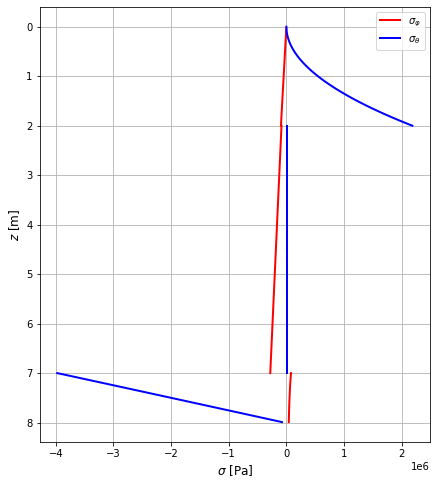

In [16]:
z1_,z2_,z3_=linspace(0,L1_,100),linspace(0,L2_,100),linspace(0,R_,100)
plot1=[sigma1_phi_(ii,L1_,R_,p_,h_,rho_,g_,alpha_) for ii in z1_]
plot2=[sigma1_theta_(ii,L1_,R_,p_,h_,rho_,g_,alpha_) for ii in z1_]
plot3=[sigma2_phi_(ii,R_,p_,h_,rho_,g_,alpha_) for ii in z2_]
plot4=[sigma2_theta_(R_,p_,h_) for ii in z2_]
plot5=[sigma3_phi_(ii,R_,p_,h_,rho_,g_) for ii in z3_]
plot6=[sigma3_theta_(ii,R_,p_,h_,rho_,g_) for ii in z3_]
fig,ax=plt.subplots(figsize=(7,8))
ax.set_xlabel(r'$\sigma$ [Pa]').set_fontsize(12)
ax.set_ylabel(r'$z$ [m]').set_fontsize(12)
ax.invert_yaxis()
ax.ticklabel_format(style="sci",axis="x",scilimits=(0,0))
ax.plot(plot1,z1_,lw=2,color='r',label=r'$\sigma_{\varphi}$')
ax.plot(plot2,z1_,lw=2,color='b',label=r'$\sigma_{\theta}$')
ax.plot(plot3,[L1_ for ii in range(100)]+z2_,lw=2,color='r')
ax.plot(plot4,[L1_ for ii in range(100)]+z2_,lw=2,color='b')
ax.plot(plot5,[L1_+L2_ for ii in range(100)]+z3_,lw=2,color='r')
ax.plot(plot6,[L1_+L2_ for ii in range(100)]+z3_,lw=2,color='b')
ax.legend(loc='best')
ax.grid(True)
plt.show()

**Poznámka:** Nespojitost meridiánového napětí $\sigma_\varphi$ implikuje nespojitou deformaci, proto v přechodových částech mezi kuželovou, válcovou a kulovou částí vznikají lokálně momenty, které popis lokálního napětí v těchto oblastech dále komplikují a nejsou ve výše aplikované membránové teorii zahrnuty.